In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

C:\Users\lokis\sample_project\env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
SIZE=256
img_data=[]

In [3]:
img=cv2.imread("C:/Users/lokis/OneDrive/Desktop/GettyImages-613462760-a1bac2a.jpg",1)

In [4]:
#resizing the image to 256x256
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

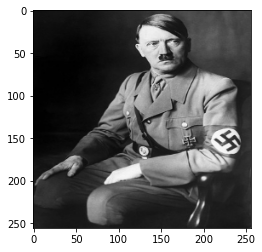

In [5]:
imshow(img)

In [6]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

C:\Users\lokis\sample_project\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(MaxPooling2D((2, 2), padding='same'))

In [9]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(img_array, img_array,
        epochs=5000,
        shuffle=True)


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0334 - loss: 0.1278
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0031 - loss: 0.1110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 2.1362e-04 - loss: 0.0924
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.0729
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0541
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0398
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.5259e-05 - loss: 0.0358
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 2.5940e-04 - loss: 0.0410
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0031 - loss: 0.0416
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0096 - loss: 0.0354
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0183 - loss: 0.0283
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1884 - loss: 0.0120
Epoch 70/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2077 - loss: 0.0119
Epoch 71/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2256 - loss: 0.0118
Epoch 72/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2387 - loss: 0.0117
Epoch 73/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2475 - loss: 0.0116
Epoch 74/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2504 - loss: 0.0115
Epoch 75/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2534 - loss: 0.0114
Epoch 76/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2579 - loss: 0.0113
Epoch 77/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2545 - loss: 0.0112
Epoch 78/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2469 - loss: 0.0111
Epoch 79/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2434 - loss: 0.0110
Epoch 80/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.24

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3338 - loss: 0.0085
Epoch 138/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3369 - loss: 0.0084
Epoch 139/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3347 - loss: 0.0084
Epoch 140/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3376 - loss: 0.0084
Epoch 141/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3445 - loss: 0.0084
Epoch 142/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3535 - loss: 0.0084
Epoch 143/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3714 - loss: 0.0083
Epoch 144/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3849 - loss: 0.0083
Epoch 145/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4032 - loss: 0.0083
Epoch 146/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4137 - loss: 0.0083
Epoch 147/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4176 - loss: 0.0082
Epoch 148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3472 - loss: 0.0074
Epoch 205/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3530 - loss: 0.0074
Epoch 206/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3445 - loss: 0.0074
Epoch 207/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3444 - loss: 0.0074
Epoch 208/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3397 - loss: 0.0074
Epoch 209/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3375 - loss: 0.0074
Epoch 210/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3401 - loss: 0.0074
Epoch 211/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3391 - loss: 0.0074
Epoch 212/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3460 - loss: 0.0073
Epoch 213/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3404 - loss: 0.0073
Epoch 214/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3473 - loss: 0.0073
Epoch 215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2975 - loss: 0.0069
Epoch 272/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2956 - loss: 0.0069
Epoch 273/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2964 - loss: 0.0069
Epoch 274/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2908 - loss: 0.0069
Epoch 275/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2949 - loss: 0.0069
Epoch 276/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2874 - loss: 0.0069
Epoch 277/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2975 - loss: 0.0069
Epoch 278/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2869 - loss: 0.0069
Epoch 279/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3008 - loss: 0.0069
Epoch 280/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2845 - loss: 0.0069
Epoch 281/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3020 - loss: 0.0069
Epoch 282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2699 - loss: 0.0065
Epoch 339/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2730 - loss: 0.0065
Epoch 340/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2634 - loss: 0.0065
Epoch 341/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2735 - loss: 0.0065
Epoch 342/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2669 - loss: 0.0065
Epoch 343/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2793 - loss: 0.0064
Epoch 344/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2745 - loss: 0.0064
Epoch 345/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2817 - loss: 0.0064
Epoch 346/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2747 - loss: 0.0064
Epoch 347/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2746 - loss: 0.0064
Epoch 348/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2709 - loss: 0.0064
Epoch 349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2562 - loss: 0.0062
Epoch 406/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2622 - loss: 0.0062
Epoch 407/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2511 - loss: 0.0062
Epoch 408/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2622 - loss: 0.0062
Epoch 409/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2521 - loss: 0.0062
Epoch 410/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2635 - loss: 0.0062
Epoch 411/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2499 - loss: 0.0062
Epoch 412/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2611 - loss: 0.0062
Epoch 413/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2538 - loss: 0.0061
Epoch 414/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2607 - loss: 0.0061
Epoch 415/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2572 - loss: 0.0061
Epoch 416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2726 - loss: 0.0059
Epoch 473/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2788 - loss: 0.0059
Epoch 474/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2714 - loss: 0.0059
Epoch 475/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2786 - loss: 0.0059
Epoch 476/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2715 - loss: 0.0059
Epoch 477/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2799 - loss: 0.0059
Epoch 478/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2729 - loss: 0.0059
Epoch 479/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2824 - loss: 0.0059
Epoch 480/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2747 - loss: 0.0059
Epoch 481/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2850 - loss: 0.0059
Epoch 482/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2746 - loss: 0.0059
Epoch 483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2830 - loss: 0.0057
Epoch 540/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2876 - loss: 0.0057
Epoch 541/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2802 - loss: 0.0057
Epoch 542/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2877 - loss: 0.0057
Epoch 543/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2812 - loss: 0.0057
Epoch 544/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2912 - loss: 0.0057
Epoch 545/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2861 - loss: 0.0057
Epoch 546/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2943 - loss: 0.0057
Epoch 547/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2888 - loss: 0.0057
Epoch 548/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2947 - loss: 0.0057
Epoch 549/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2898 - loss: 0.0057
Epoch 550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3011 - loss: 0.0056
Epoch 607/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2926 - loss: 0.0056
Epoch 608/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2993 - loss: 0.0055
Epoch 609/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2970 - loss: 0.0055
Epoch 610/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2990 - loss: 0.0055
Epoch 611/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3022 - loss: 0.0055
Epoch 612/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2974 - loss: 0.0055
Epoch 613/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3062 - loss: 0.0056
Epoch 614/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2965 - loss: 0.0056
Epoch 615/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3079 - loss: 0.0056
Epoch 616/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2951 - loss: 0.0056
Epoch 617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3020 - loss: 0.0054
Epoch 674/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3018 - loss: 0.0054
Epoch 675/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3020 - loss: 0.0054
Epoch 676/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3043 - loss: 0.0054
Epoch 677/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2994 - loss: 0.0054
Epoch 678/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3039 - loss: 0.0054
Epoch 679/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2960 - loss: 0.0054
Epoch 680/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3023 - loss: 0.0054
Epoch 681/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2935 - loss: 0.0054
Epoch 682/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3018 - loss: 0.0054
Epoch 683/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2938 - loss: 0.0054
Epoch 684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3058 - loss: 0.0053
Epoch 741/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3132 - loss: 0.0053
Epoch 742/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3091 - loss: 0.0053
Epoch 743/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3218 - loss: 0.0053
Epoch 744/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3150 - loss: 0.0053
Epoch 745/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3291 - loss: 0.0053
Epoch 746/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3191 - loss: 0.0053
Epoch 747/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3258 - loss: 0.0053
Epoch 748/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3169 - loss: 0.0052
Epoch 749/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3146 - loss: 0.0052
Epoch 750/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3137 - loss: 0.0052
Epoch 751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3217 - loss: 0.0051
Epoch 808/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3176 - loss: 0.0052
Epoch 809/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3278 - loss: 0.0052
Epoch 810/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3217 - loss: 0.0052
Epoch 811/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3342 - loss: 0.0052
Epoch 812/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3277 - loss: 0.0052
Epoch 813/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3351 - loss: 0.0051
Epoch 814/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3269 - loss: 0.0051
Epoch 815/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3255 - loss: 0.0051
Epoch 816/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3251 - loss: 0.0051
Epoch 817/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3196 - loss: 0.0051
Epoch 818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3381 - loss: 0.0050
Epoch 875/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3405 - loss: 0.0050
Epoch 876/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3400 - loss: 0.0050
Epoch 877/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3379 - loss: 0.0050
Epoch 878/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3397 - loss: 0.0050
Epoch 879/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3326 - loss: 0.0050
Epoch 880/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3363 - loss: 0.0050
Epoch 881/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3301 - loss: 0.0050
Epoch 882/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3384 - loss: 0.0050
Epoch 883/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3343 - loss: 0.0050
Epoch 884/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3399 - loss: 0.0050
Epoch 885/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3366 - loss: 0.0049
Epoch 942/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3300 - loss: 0.0049
Epoch 943/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3338 - loss: 0.0049
Epoch 944/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3344 - loss: 0.0049
Epoch 945/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3335 - loss: 0.0049
Epoch 946/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3385 - loss: 0.0049
Epoch 947/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3357 - loss: 0.0049
Epoch 948/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3414 - loss: 0.0049
Epoch 949/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3345 - loss: 0.0049
Epoch 950/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3419 - loss: 0.0049
Epoch 951/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3332 - loss: 0.0049
Epoch 952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3357 - loss: 0.0048
Epoch 1009/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3433 - loss: 0.0048
Epoch 1010/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3331 - loss: 0.0048
Epoch 1011/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3420 - loss: 0.0048
Epoch 1012/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3374 - loss: 0.0048
Epoch 1013/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3421 - loss: 0.0048
Epoch 1014/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3439 - loss: 0.0048
Epoch 1015/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3420 - loss: 0.0048
Epoch 1016/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3468 - loss: 0.0048
Epoch 1017/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3408 - loss: 0.0048
Epoch 1018/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3477 - loss: 0.0048
Epoch 1019/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3570 - loss: 0.0047
Epoch 1076/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3520 - loss: 0.0047
Epoch 1077/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3607 - loss: 0.0047
Epoch 1078/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3517 - loss: 0.0047
Epoch 1079/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3604 - loss: 0.0047
Epoch 1080/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3510 - loss: 0.0047
Epoch 1081/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3575 - loss: 0.0047
Epoch 1082/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3546 - loss: 0.0047
Epoch 1083/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3540 - loss: 0.0047
Epoch 1084/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3562 - loss: 0.0047
Epoch 1085/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3517 - loss: 0.0047
Epoch 1086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3633 - loss: 0.0046
Epoch 1143/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3632 - loss: 0.0046
Epoch 1144/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3649 - loss: 0.0046
Epoch 1145/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3622 - loss: 0.0046
Epoch 1146/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3652 - loss: 0.0046
Epoch 1147/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3616 - loss: 0.0046
Epoch 1148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3673 - loss: 0.0046
Epoch 1149/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3639 - loss: 0.0046
Epoch 1150/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3676 - loss: 0.0046
Epoch 1151/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3640 - loss: 0.0046
Epoch 1152/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3662 - loss: 0.0046
Epoch 1153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3659 - loss: 0.0045
Epoch 1210/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3718 - loss: 0.0045
Epoch 1211/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3641 - loss: 0.0045
Epoch 1212/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3703 - loss: 0.0045
Epoch 1213/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3620 - loss: 0.0046
Epoch 1214/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3706 - loss: 0.0046
Epoch 1215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3593 - loss: 0.0046
Epoch 1216/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3704 - loss: 0.0046
Epoch 1217/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3609 - loss: 0.0046
Epoch 1218/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3709 - loss: 0.0045
Epoch 1219/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3680 - loss: 0.0045
Epoch 1220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3760 - loss: 0.0044
Epoch 1277/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3686 - loss: 0.0044
Epoch 1278/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3748 - loss: 0.0045
Epoch 1279/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3670 - loss: 0.0045
Epoch 1280/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3786 - loss: 0.0045
Epoch 1281/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3704 - loss: 0.0045
Epoch 1282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3798 - loss: 0.0044
Epoch 1283/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3753 - loss: 0.0044
Epoch 1284/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3784 - loss: 0.0044
Epoch 1285/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3795 - loss: 0.0044
Epoch 1286/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3753 - loss: 0.0044
Epoch 1287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3874 - loss: 0.0044
Epoch 1344/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3722 - loss: 0.0044
Epoch 1345/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3823 - loss: 0.0044
Epoch 1346/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3728 - loss: 0.0043
Epoch 1347/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3742 - loss: 0.0043
Epoch 1348/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3790 - loss: 0.0043
Epoch 1349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3741 - loss: 0.0044
Epoch 1350/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3861 - loss: 0.0044
Epoch 1351/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3760 - loss: 0.0044
Epoch 1352/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3878 - loss: 0.0044
Epoch 1353/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3776 - loss: 0.0044
Epoch 1354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3692 - loss: 0.0043
Epoch 1411/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3788 - loss: 0.0043
Epoch 1412/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3686 - loss: 0.0043
Epoch 1413/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3795 - loss: 0.0043
Epoch 1414/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3720 - loss: 0.0043
Epoch 1415/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3748 - loss: 0.0043
Epoch 1416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3736 - loss: 0.0042
Epoch 1417/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3724 - loss: 0.0043
Epoch 1418/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3795 - loss: 0.0043
Epoch 1419/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3730 - loss: 0.0043
Epoch 1420/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3820 - loss: 0.0043
Epoch 1421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3730 - loss: 0.0042
Epoch 1478/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3736 - loss: 0.0042
Epoch 1479/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3795 - loss: 0.0042
Epoch 1480/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3748 - loss: 0.0042
Epoch 1481/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3831 - loss: 0.0042
Epoch 1482/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3748 - loss: 0.0042
Epoch 1483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3830 - loss: 0.0042
Epoch 1484/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3720 - loss: 0.0042
Epoch 1485/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3803 - loss: 0.0042
Epoch 1486/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3707 - loss: 0.0042
Epoch 1487/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3753 - loss: 0.0042
Epoch 1488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3705 - loss: 0.0041
Epoch 1545/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3748 - loss: 0.0041
Epoch 1546/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3705 - loss: 0.0041
Epoch 1547/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3715 - loss: 0.0041
Epoch 1548/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3723 - loss: 0.0041
Epoch 1549/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3707 - loss: 0.0041
Epoch 1550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3764 - loss: 0.0041
Epoch 1551/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3709 - loss: 0.0041
Epoch 1552/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3779 - loss: 0.0041
Epoch 1553/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3686 - loss: 0.0042
Epoch 1554/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3807 - loss: 0.0042
Epoch 1555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3684 - loss: 0.0041
Epoch 1612/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3668 - loss: 0.0040
Epoch 1613/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3697 - loss: 0.0040
Epoch 1614/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3700 - loss: 0.0040
Epoch 1615/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3683 - loss: 0.0040
Epoch 1616/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3701 - loss: 0.0040
Epoch 1617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3632 - loss: 0.0041
Epoch 1618/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3695 - loss: 0.0041
Epoch 1619/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3589 - loss: 0.0041
Epoch 1620/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3720 - loss: 0.0041
Epoch 1621/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3547 - loss: 0.0041
Epoch 1622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3611 - loss: 0.0040
Epoch 1679/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3713 - loss: 0.0040
Epoch 1680/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3546 - loss: 0.0041
Epoch 1681/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3712 - loss: 0.0041
Epoch 1682/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3489 - loss: 0.0041
Epoch 1683/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3733 - loss: 0.0041
Epoch 1684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3528 - loss: 0.0041
Epoch 1685/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3712 - loss: 0.0040
Epoch 1686/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3604 - loss: 0.0040
Epoch 1687/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3714 - loss: 0.0040
Epoch 1688/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3699 - loss: 0.0040
Epoch 1689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3537 - loss: 0.0040
Epoch 1746/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3660 - loss: 0.0040
Epoch 1747/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3512 - loss: 0.0040
Epoch 1748/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3677 - loss: 0.0040
Epoch 1749/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3530 - loss: 0.0040
Epoch 1750/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3679 - loss: 0.0040
Epoch 1751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3590 - loss: 0.0039
Epoch 1752/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3668 - loss: 0.0039
Epoch 1753/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3614 - loss: 0.0039
Epoch 1754/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3651 - loss: 0.0039
Epoch 1755/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3645 - loss: 0.0039
Epoch 1756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3572 - loss: 0.0039
Epoch 1813/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3723 - loss: 0.0039
Epoch 1814/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3549 - loss: 0.0039
Epoch 1815/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3690 - loss: 0.0039
Epoch 1816/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3529 - loss: 0.0039
Epoch 1817/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3667 - loss: 0.0039
Epoch 1818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3575 - loss: 0.0039
Epoch 1819/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3669 - loss: 0.0039
Epoch 1820/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3605 - loss: 0.0039
Epoch 1821/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3658 - loss: 0.0039
Epoch 1822/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3624 - loss: 0.0039
Epoch 1823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3648 - loss: 0.0038
Epoch 1880/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3624 - loss: 0.0038
Epoch 1881/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3598 - loss: 0.0038
Epoch 1882/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3636 - loss: 0.0038
Epoch 1883/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3611 - loss: 0.0038
Epoch 1884/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3707 - loss: 0.0038
Epoch 1885/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3604 - loss: 0.0038
Epoch 1886/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3744 - loss: 0.0038
Epoch 1887/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3637 - loss: 0.0039
Epoch 1888/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3764 - loss: 0.0039
Epoch 1889/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3628 - loss: 0.0039
Epoch 1890/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3685 - loss: 0.0038
Epoch 1947/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3613 - loss: 0.0038
Epoch 1948/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3756 - loss: 0.0038
Epoch 1949/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3571 - loss: 0.0038
Epoch 1950/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3711 - loss: 0.0038
Epoch 1951/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3604 - loss: 0.0039
Epoch 1952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3724 - loss: 0.0038
Epoch 1953/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3508 - loss: 0.0039
Epoch 1954/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3783 - loss: 0.0039
Epoch 1955/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3550 - loss: 0.0039
Epoch 1956/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3802 - loss: 0.0039
Epoch 1957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3666 - loss: 0.0037
Epoch 2014/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3656 - loss: 0.0037
Epoch 2015/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3709 - loss: 0.0037
Epoch 2016/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3669 - loss: 0.0037
Epoch 2017/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3712 - loss: 0.0037
Epoch 2018/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3626 - loss: 0.0038
Epoch 2019/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3779 - loss: 0.0038
Epoch 2020/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3613 - loss: 0.0038
Epoch 2021/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3811 - loss: 0.0038
Epoch 2022/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3659 - loss: 0.0038
Epoch 2023/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3787 - loss: 0.0038
Epoch 2024/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3648 - loss: 0.0037
Epoch 2081/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3796 - loss: 0.0037
Epoch 2082/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3619 - loss: 0.0038
Epoch 2083/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3842 - loss: 0.0038
Epoch 2084/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3626 - loss: 0.0037
Epoch 2085/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3796 - loss: 0.0037
Epoch 2086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3666 - loss: 0.0037
Epoch 2087/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3710 - loss: 0.0037
Epoch 2088/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3706 - loss: 0.0037
Epoch 2089/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3656 - loss: 0.0037
Epoch 2090/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3751 - loss: 0.0037
Epoch 2091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3713 - loss: 0.0036
Epoch 2148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3762 - loss: 0.0037
Epoch 2149/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3680 - loss: 0.0037
Epoch 2150/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3806 - loss: 0.0037
Epoch 2151/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3633 - loss: 0.0037
Epoch 2152/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3736 - loss: 0.0037
Epoch 2153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3597 - loss: 0.0037
Epoch 2154/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3725 - loss: 0.0037
Epoch 2155/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3611 - loss: 0.0037
Epoch 2156/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3822 - loss: 0.0037
Epoch 2157/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3674 - loss: 0.0037
Epoch 2158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3873 - loss: 0.0037
Epoch 2215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3649 - loss: 0.0037
Epoch 2216/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3891 - loss: 0.0037
Epoch 2217/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3704 - loss: 0.0036
Epoch 2218/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3835 - loss: 0.0036
Epoch 2219/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3778 - loss: 0.0036
Epoch 2220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3732 - loss: 0.0036
Epoch 2221/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3801 - loss: 0.0036
Epoch 2222/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3697 - loss: 0.0036
Epoch 2223/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3800 - loss: 0.0036
Epoch 2224/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3693 - loss: 0.0037
Epoch 2225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3859 - loss: 0.0036
Epoch 2282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3662 - loss: 0.0036
Epoch 2283/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3748 - loss: 0.0036
Epoch 2284/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3677 - loss: 0.0036
Epoch 2285/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3710 - loss: 0.0036
Epoch 2286/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3716 - loss: 0.0036
Epoch 2287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3726 - loss: 0.0036
Epoch 2288/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3767 - loss: 0.0036
Epoch 2289/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3731 - loss: 0.0036
Epoch 2290/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3774 - loss: 0.0036
Epoch 2291/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3757 - loss: 0.0036
Epoch 2292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3748 - loss: 0.0036
Epoch 2349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3679 - loss: 0.0036
Epoch 2350/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3803 - loss: 0.0036
Epoch 2351/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3646 - loss: 0.0036
Epoch 2352/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3850 - loss: 0.0036
Epoch 2353/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3588 - loss: 0.0036
Epoch 2354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3803 - loss: 0.0036
Epoch 2355/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3581 - loss: 0.0036
Epoch 2356/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3676 - loss: 0.0035
Epoch 2357/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3653 - loss: 0.0035
Epoch 2358/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3656 - loss: 0.0035
Epoch 2359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3716 - loss: 0.0035
Epoch 2416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3657 - loss: 0.0035
Epoch 2417/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3723 - loss: 0.0036
Epoch 2418/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3610 - loss: 0.0036
Epoch 2419/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3814 - loss: 0.0036
Epoch 2420/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3545 - loss: 0.0037
Epoch 2421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3882 - loss: 0.0037
Epoch 2422/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3546 - loss: 0.0037
Epoch 2423/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3851 - loss: 0.0036
Epoch 2424/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3610 - loss: 0.0036
Epoch 2425/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3728 - loss: 0.0035
Epoch 2426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3789 - loss: 0.0035
Epoch 2483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3667 - loss: 0.0035
Epoch 2484/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3707 - loss: 0.0035
Epoch 2485/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3734 - loss: 0.0035
Epoch 2486/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3660 - loss: 0.0035
Epoch 2487/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3734 - loss: 0.0035
Epoch 2488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3638 - loss: 0.0035
Epoch 2489/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3711 - loss: 0.0035
Epoch 2490/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3608 - loss: 0.0035
Epoch 2491/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3738 - loss: 0.0035
Epoch 2492/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3573 - loss: 0.0036
Epoch 2493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3678 - loss: 0.0035
Epoch 2550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3675 - loss: 0.0035
Epoch 2551/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3691 - loss: 0.0035
Epoch 2552/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3676 - loss: 0.0035
Epoch 2553/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3686 - loss: 0.0035
Epoch 2554/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3703 - loss: 0.0035
Epoch 2555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3614 - loss: 0.0035
Epoch 2556/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3735 - loss: 0.0035
Epoch 2557/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3554 - loss: 0.0035
Epoch 2558/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3777 - loss: 0.0035
Epoch 2559/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3566 - loss: 0.0036
Epoch 2560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3670 - loss: 0.0035
Epoch 2617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3536 - loss: 0.0035
Epoch 2618/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3742 - loss: 0.0035
Epoch 2619/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3560 - loss: 0.0035
Epoch 2620/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3835 - loss: 0.0035
Epoch 2621/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3593 - loss: 0.0035
Epoch 2622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3761 - loss: 0.0034
Epoch 2623/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3617 - loss: 0.0034
Epoch 2624/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3608 - loss: 0.0034
Epoch 2625/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3633 - loss: 0.0034
Epoch 2626/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3612 - loss: 0.0034
Epoch 2627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3657 - loss: 0.0034
Epoch 2684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3550 - loss: 0.0034
Epoch 2685/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3744 - loss: 0.0035
Epoch 2686/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3533 - loss: 0.0035
Epoch 2687/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3813 - loss: 0.0035
Epoch 2688/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3543 - loss: 0.0035
Epoch 2689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3694 - loss: 0.0034
Epoch 2690/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3624 - loss: 0.0034
Epoch 2691/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3604 - loss: 0.0034
Epoch 2692/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3656 - loss: 0.0034
Epoch 2693/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3609 - loss: 0.0034
Epoch 2694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3492 - loss: 0.0034
Epoch 2751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3751 - loss: 0.0034
Epoch 2752/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3507 - loss: 0.0034
Epoch 2753/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3632 - loss: 0.0034
Epoch 2754/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3589 - loss: 0.0034
Epoch 2755/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3506 - loss: 0.0034
Epoch 2756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3662 - loss: 0.0034
Epoch 2757/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3553 - loss: 0.0034
Epoch 2758/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3664 - loss: 0.0034
Epoch 2759/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3632 - loss: 0.0034
Epoch 2760/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3656 - loss: 0.0034
Epoch 2761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3577 - loss: 0.0034
Epoch 2818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3647 - loss: 0.0034
Epoch 2819/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3558 - loss: 0.0034
Epoch 2820/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3635 - loss: 0.0034
Epoch 2821/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3533 - loss: 0.0034
Epoch 2822/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3735 - loss: 0.0034
Epoch 2823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3518 - loss: 0.0035
Epoch 2824/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3848 - loss: 0.0035
Epoch 2825/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3508 - loss: 0.0035
Epoch 2826/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3784 - loss: 0.0034
Epoch 2827/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3530 - loss: 0.0034
Epoch 2828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3521 - loss: 0.0033
Epoch 2885/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3472 - loss: 0.0033
Epoch 2886/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3654 - loss: 0.0034
Epoch 2887/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3457 - loss: 0.0034
Epoch 2888/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3688 - loss: 0.0034
Epoch 2889/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3488 - loss: 0.0034
Epoch 2890/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3650 - loss: 0.0034
Epoch 2891/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3506 - loss: 0.0033
Epoch 2892/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3540 - loss: 0.0033
Epoch 2893/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3525 - loss: 0.0033
Epoch 2894/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3438 - loss: 0.0033
Epoch 2895/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3554 - loss: 0.0033
Epoch 2952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3459 - loss: 0.0033
Epoch 2953/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3514 - loss: 0.0033
Epoch 2954/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3460 - loss: 0.0034
Epoch 2955/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3570 - loss: 0.0034
Epoch 2956/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3411 - loss: 0.0034
Epoch 2957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3659 - loss: 0.0034
Epoch 2958/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3391 - loss: 0.0034
Epoch 2959/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3596 - loss: 0.0033
Epoch 2960/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3418 - loss: 0.0033
Epoch 2961/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3492 - loss: 0.0033
Epoch 2962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3520 - loss: 0.0033
Epoch 3019/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3348 - loss: 0.0033
Epoch 3020/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3469 - loss: 0.0033
Epoch 3021/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3421 - loss: 0.0033
Epoch 3022/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3358 - loss: 0.0033
Epoch 3023/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3454 - loss: 0.0033
Epoch 3024/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3300 - loss: 0.0033
Epoch 3025/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3461 - loss: 0.0033
Epoch 3026/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3344 - loss: 0.0033
Epoch 3027/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3468 - loss: 0.0033
Epoch 3028/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3427 - loss: 0.0033
Epoch 3029/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3269 - loss: 0.0033
Epoch 3086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3432 - loss: 0.0033
Epoch 3087/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3283 - loss: 0.0033
Epoch 3088/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3416 - loss: 0.0033
Epoch 3089/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3277 - loss: 0.0034
Epoch 3090/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3513 - loss: 0.0033
Epoch 3091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3261 - loss: 0.0033
Epoch 3092/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3485 - loss: 0.0033
Epoch 3093/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3327 - loss: 0.0033
Epoch 3094/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3398 - loss: 0.0033
Epoch 3095/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3363 - loss: 0.0032
Epoch 3096/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3492 - loss: 0.0033
Epoch 3153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3332 - loss: 0.0033
Epoch 3154/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3435 - loss: 0.0033
Epoch 3155/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3313 - loss: 0.0033
Epoch 3156/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3504 - loss: 0.0033
Epoch 3157/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3261 - loss: 0.0033
Epoch 3158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3322 - loss: 0.0032
Epoch 3159/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3390 - loss: 0.0033
Epoch 3160/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3233 - loss: 0.0033
Epoch 3161/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3347 - loss: 0.0033
Epoch 3162/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3284 - loss: 0.0033
Epoch 3163/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3394 - loss: 0.0033
Epoch 3220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3260 - loss: 0.0033
Epoch 3221/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3429 - loss: 0.0033
Epoch 3222/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3233 - loss: 0.0033
Epoch 3223/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3436 - loss: 0.0033
Epoch 3224/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3226 - loss: 0.0033
Epoch 3225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3399 - loss: 0.0032
Epoch 3226/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3279 - loss: 0.0032
Epoch 3227/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3344 - loss: 0.0032
Epoch 3228/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3349 - loss: 0.0032
Epoch 3229/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3311 - loss: 0.0032
Epoch 3230/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3181 - loss: 0.0032
Epoch 3287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3382 - loss: 0.0032
Epoch 3288/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3223 - loss: 0.0032
Epoch 3289/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3293 - loss: 0.0032
Epoch 3290/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3308 - loss: 0.0032
Epoch 3291/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3241 - loss: 0.0032
Epoch 3292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3360 - loss: 0.0032
Epoch 3293/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3278 - loss: 0.0032
Epoch 3294/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3322 - loss: 0.0032
Epoch 3295/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3297 - loss: 0.0032
Epoch 3296/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3299 - loss: 0.0032
Epoch 3297/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3182 - loss: 0.0032
Epoch 3354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3349 - loss: 0.0032
Epoch 3355/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3208 - loss: 0.0032
Epoch 3356/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3294 - loss: 0.0032
Epoch 3357/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3275 - loss: 0.0032
Epoch 3358/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3290 - loss: 0.0032
Epoch 3359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3335 - loss: 0.0032
Epoch 3360/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3298 - loss: 0.0032
Epoch 3361/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3351 - loss: 0.0032
Epoch 3362/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3279 - loss: 0.0032
Epoch 3363/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3326 - loss: 0.0032
Epoch 3364/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3295 - loss: 0.0031
Epoch 3421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3272 - loss: 0.0031
Epoch 3422/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3289 - loss: 0.0031
Epoch 3423/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3325 - loss: 0.0032
Epoch 3424/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3260 - loss: 0.0032
Epoch 3425/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3352 - loss: 0.0032
Epoch 3426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3199 - loss: 0.0032
Epoch 3427/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3322 - loss: 0.0032
Epoch 3428/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3169 - loss: 0.0032
Epoch 3429/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3273 - loss: 0.0031
Epoch 3430/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3228 - loss: 0.0031
Epoch 3431/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3254 - loss: 0.0031
Epoch 3488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3243 - loss: 0.0031
Epoch 3489/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3288 - loss: 0.0031
Epoch 3490/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3221 - loss: 0.0031
Epoch 3491/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3255 - loss: 0.0031
Epoch 3492/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3257 - loss: 0.0031
Epoch 3493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3250 - loss: 0.0031
Epoch 3494/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3307 - loss: 0.0031
Epoch 3495/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3233 - loss: 0.0031
Epoch 3496/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3324 - loss: 0.0031
Epoch 3497/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3262 - loss: 0.0031
Epoch 3498/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3366 - loss: 0.0031
Epoch 3555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3237 - loss: 0.0032
Epoch 3556/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3428 - loss: 0.0032
Epoch 3557/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3147 - loss: 0.0032
Epoch 3558/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3392 - loss: 0.0032
Epoch 3559/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3124 - loss: 0.0032
Epoch 3560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3348 - loss: 0.0032
Epoch 3561/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3149 - loss: 0.0032
Epoch 3562/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3333 - loss: 0.0031
Epoch 3563/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3211 - loss: 0.0031
Epoch 3564/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3272 - loss: 0.0031
Epoch 3565/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3347 - loss: 0.0032
Epoch 3622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3142 - loss: 0.0032
Epoch 3623/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3280 - loss: 0.0031
Epoch 3624/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3179 - loss: 0.0031
Epoch 3625/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3227 - loss: 0.0031
Epoch 3626/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3235 - loss: 0.0031
Epoch 3627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3172 - loss: 0.0031
Epoch 3628/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3335 - loss: 0.0031
Epoch 3629/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3143 - loss: 0.0032
Epoch 3630/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3322 - loss: 0.0031
Epoch 3631/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3174 - loss: 0.0031
Epoch 3632/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3286 - loss: 0.0031
Epoch 3689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3170 - loss: 0.0031
Epoch 3690/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3284 - loss: 0.0031
Epoch 3691/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3138 - loss: 0.0031
Epoch 3692/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3272 - loss: 0.0031
Epoch 3693/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3168 - loss: 0.0031
Epoch 3694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3236 - loss: 0.0031
Epoch 3695/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3211 - loss: 0.0031
Epoch 3696/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3236 - loss: 0.0031
Epoch 3697/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3221 - loss: 0.0031
Epoch 3698/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3264 - loss: 0.0031
Epoch 3699/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3304 - loss: 0.0031
Epoch 3756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3162 - loss: 0.0031
Epoch 3757/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3322 - loss: 0.0031
Epoch 3758/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3166 - loss: 0.0031
Epoch 3759/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3273 - loss: 0.0031
Epoch 3760/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3123 - loss: 0.0031
Epoch 3761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3205 - loss: 0.0031
Epoch 3762/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3144 - loss: 0.0030
Epoch 3763/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3168 - loss: 0.0030
Epoch 3764/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3230 - loss: 0.0031
Epoch 3765/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3153 - loss: 0.0031
Epoch 3766/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3123 - loss: 0.0031
Epoch 3823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3269 - loss: 0.0031
Epoch 3824/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3092 - loss: 0.0032
Epoch 3825/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3342 - loss: 0.0032
Epoch 3826/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3088 - loss: 0.0032
Epoch 3827/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3368 - loss: 0.0032
Epoch 3828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3083 - loss: 0.0032
Epoch 3829/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3304 - loss: 0.0031
Epoch 3830/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3098 - loss: 0.0031
Epoch 3831/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3207 - loss: 0.0031
Epoch 3832/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3169 - loss: 0.0030
Epoch 3833/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3103 - loss: 0.0030
Epoch 3890/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3232 - loss: 0.0030
Epoch 3891/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3141 - loss: 0.0030
Epoch 3892/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3244 - loss: 0.0030
Epoch 3893/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3159 - loss: 0.0031
Epoch 3894/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3215 - loss: 0.0030
Epoch 3895/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3149 - loss: 0.0030
Epoch 3896/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3234 - loss: 0.0030
Epoch 3897/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3163 - loss: 0.0030
Epoch 3898/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3229 - loss: 0.0030
Epoch 3899/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3188 - loss: 0.0030
Epoch 3900/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3192 - loss: 0.0030
Epoch 3957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3110 - loss: 0.0030
Epoch 3958/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3204 - loss: 0.0030
Epoch 3959/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3139 - loss: 0.0030
Epoch 3960/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3207 - loss: 0.0030
Epoch 3961/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3157 - loss: 0.0030
Epoch 3962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3203 - loss: 0.0030
Epoch 3963/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3155 - loss: 0.0030
Epoch 3964/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3209 - loss: 0.0030
Epoch 3965/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3136 - loss: 0.0030
Epoch 3966/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3209 - loss: 0.0030
Epoch 3967/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3280 - loss: 0.0031
Epoch 4024/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3023 - loss: 0.0032
Epoch 4025/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3329 - loss: 0.0032
Epoch 4026/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2988 - loss: 0.0032
Epoch 4027/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3277 - loss: 0.0031
Epoch 4028/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3013 - loss: 0.0031
Epoch 4029/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3148 - loss: 0.0030
Epoch 4030/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3110 - loss: 0.0030
Epoch 4031/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3082 - loss: 0.0030
Epoch 4032/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3240 - loss: 0.0030
Epoch 4033/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3078 - loss: 0.0031
Epoch 4034/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3206 - loss: 0.0030
Epoch 4091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3072 - loss: 0.0030
Epoch 4092/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3166 - loss: 0.0030
Epoch 4093/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3138 - loss: 0.0030
Epoch 4094/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3117 - loss: 0.0030
Epoch 4095/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3162 - loss: 0.0030
Epoch 4096/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3095 - loss: 0.0030
Epoch 4097/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3136 - loss: 0.0030
Epoch 4098/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3087 - loss: 0.0030
Epoch 4099/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3101 - loss: 0.0030
Epoch 4100/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3113 - loss: 0.0030
Epoch 4101/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2976 - loss: 0.0031
Epoch 4158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3223 - loss: 0.0031
Epoch 4159/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2981 - loss: 0.0031
Epoch 4160/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3176 - loss: 0.0030
Epoch 4161/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3043 - loss: 0.0030
Epoch 4162/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3161 - loss: 0.0030
Epoch 4163/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3142 - loss: 0.0030
Epoch 4164/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3104 - loss: 0.0030
Epoch 4165/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3192 - loss: 0.0030
Epoch 4166/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3039 - loss: 0.0030
Epoch 4167/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3204 - loss: 0.0030
Epoch 4168/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3105 - loss: 0.0030
Epoch 4225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3142 - loss: 0.0030
Epoch 4226/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3074 - loss: 0.0030
Epoch 4227/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3170 - loss: 0.0030
Epoch 4228/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3064 - loss: 0.0030
Epoch 4229/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3192 - loss: 0.0030
Epoch 4230/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3025 - loss: 0.0030
Epoch 4231/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3206 - loss: 0.0030
Epoch 4232/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3008 - loss: 0.0031
Epoch 4233/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3251 - loss: 0.0031
Epoch 4234/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3009 - loss: 0.0031
Epoch 4235/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3047 - loss: 0.0030
Epoch 4292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3151 - loss: 0.0030
Epoch 4293/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3068 - loss: 0.0030
Epoch 4294/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3154 - loss: 0.0030
Epoch 4295/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3097 - loss: 0.0030
Epoch 4296/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3202 - loss: 0.0030
Epoch 4297/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3077 - loss: 0.0030
Epoch 4298/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3196 - loss: 0.0030
Epoch 4299/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3055 - loss: 0.0029
Epoch 4300/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3140 - loss: 0.0029
Epoch 4301/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3074 - loss: 0.0029
Epoch 4302/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3053 - loss: 0.0029
Epoch 4359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3013 - loss: 0.0029
Epoch 4360/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3101 - loss: 0.0030
Epoch 4361/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2983 - loss: 0.0030
Epoch 4362/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3139 - loss: 0.0030
Epoch 4363/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2976 - loss: 0.0030
Epoch 4364/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3133 - loss: 0.0029
Epoch 4365/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3047 - loss: 0.0029
Epoch 4366/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3088 - loss: 0.0029
Epoch 4367/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3140 - loss: 0.0029
Epoch 4368/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3018 - loss: 0.0029
Epoch 4369/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3073 - loss: 0.0029
Epoch 4426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2993 - loss: 0.0030
Epoch 4427/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3123 - loss: 0.0030
Epoch 4428/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3007 - loss: 0.0030
Epoch 4429/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3149 - loss: 0.0029
Epoch 4430/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3035 - loss: 0.0029
Epoch 4431/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3112 - loss: 0.0029
Epoch 4432/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3054 - loss: 0.0029
Epoch 4433/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3059 - loss: 0.0029
Epoch 4434/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3118 - loss: 0.0029
Epoch 4435/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3039 - loss: 0.0029
Epoch 4436/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3154 - loss: 0.0029
Epoch 4493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2999 - loss: 0.0030
Epoch 4494/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3179 - loss: 0.0030
Epoch 4495/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3005 - loss: 0.0030
Epoch 4496/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3153 - loss: 0.0030
Epoch 4497/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2972 - loss: 0.0029
Epoch 4498/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3086 - loss: 0.0029
Epoch 4499/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3005 - loss: 0.0029
Epoch 4500/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3089 - loss: 0.0029
Epoch 4501/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3127 - loss: 0.0029
Epoch 4502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3071 - loss: 0.0029
Epoch 4503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3048 - loss: 0.0029
Epoch 4560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3114 - loss: 0.0029
Epoch 4561/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3057 - loss: 0.0029
Epoch 4562/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3156 - loss: 0.0029
Epoch 4563/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3072 - loss: 0.0030
Epoch 4564/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3197 - loss: 0.0029
Epoch 4565/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2993 - loss: 0.0030
Epoch 4566/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3172 - loss: 0.0030
Epoch 4567/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2990 - loss: 0.0030
Epoch 4568/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3137 - loss: 0.0029
Epoch 4569/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3051 - loss: 0.0029
Epoch 4570/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3011 - loss: 0.0029
Epoch 4627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3167 - loss: 0.0029
Epoch 4628/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3055 - loss: 0.0029
Epoch 4629/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3159 - loss: 0.0029
Epoch 4630/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3044 - loss: 0.0029
Epoch 4631/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3128 - loss: 0.0029
Epoch 4632/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3015 - loss: 0.0029
Epoch 4633/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3104 - loss: 0.0029
Epoch 4634/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3061 - loss: 0.0029
Epoch 4635/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3078 - loss: 0.0029
Epoch 4636/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3143 - loss: 0.0029
Epoch 4637/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3049 - loss: 0.0029
Epoch 4694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3145 - loss: 0.0029
Epoch 4695/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3081 - loss: 0.0029
Epoch 4696/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3094 - loss: 0.0029
Epoch 4697/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3086 - loss: 0.0029
Epoch 4698/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3097 - loss: 0.0029
Epoch 4699/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3059 - loss: 0.0029
Epoch 4700/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3111 - loss: 0.0029
Epoch 4701/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3046 - loss: 0.0029
Epoch 4702/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3141 - loss: 0.0029
Epoch 4703/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3075 - loss: 0.0029
Epoch 4704/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3061 - loss: 0.0028
Epoch 4761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3105 - loss: 0.0029
Epoch 4762/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3067 - loss: 0.0029
Epoch 4763/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3143 - loss: 0.0029
Epoch 4764/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3035 - loss: 0.0029
Epoch 4765/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3157 - loss: 0.0029
Epoch 4766/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2981 - loss: 0.0030
Epoch 4767/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3167 - loss: 0.0029
Epoch 4768/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2990 - loss: 0.0029
Epoch 4769/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3121 - loss: 0.0029
Epoch 4770/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3029 - loss: 0.0029
Epoch 4771/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2973 - loss: 0.0029
Epoch 4828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3108 - loss: 0.0029
Epoch 4829/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3001 - loss: 0.0029
Epoch 4830/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3040 - loss: 0.0029
Epoch 4831/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3073 - loss: 0.0028
Epoch 4832/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3051 - loss: 0.0029
Epoch 4833/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3154 - loss: 0.0029
Epoch 4834/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3076 - loss: 0.0029
Epoch 4835/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3169 - loss: 0.0029
Epoch 4836/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3052 - loss: 0.0029
Epoch 4837/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3147 - loss: 0.0029
Epoch 4838/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3076 - loss: 0.0028
Epoch 4895/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3086 - loss: 0.0028
Epoch 4896/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3027 - loss: 0.0029
Epoch 4897/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3127 - loss: 0.0029
Epoch 4898/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2994 - loss: 0.0029
Epoch 4899/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3139 - loss: 0.0029
Epoch 4900/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3009 - loss: 0.0029
Epoch 4901/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3147 - loss: 0.0029
Epoch 4902/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3034 - loss: 0.0029
Epoch 4903/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3101 - loss: 0.0028
Epoch 4904/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3069 - loss: 0.0028
Epoch 4905/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3159 - loss: 0.0029
Epoch 4962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2986 - loss: 0.0030
Epoch 4963/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3235 - loss: 0.0030
Epoch 4964/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2932 - loss: 0.0031
Epoch 4965/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3259 - loss: 0.0031
Epoch 4966/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2920 - loss: 0.0031
Epoch 4967/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3195 - loss: 0.0029
Epoch 4968/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3020 - loss: 0.0028
Epoch 4969/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3045 - loss: 0.0028
Epoch 4970/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3132 - loss: 0.0029
Epoch 4971/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2951 - loss: 0.0029
Epoch 4972/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms

In [12]:
print("Autoencoder output")
pred = model.predict(img_array)

Autoencoder output
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


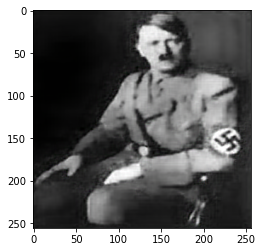

In [13]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")